<a href="https://colab.research.google.com/github/GolDRoger69/Drug-Discovery-using-ML/blob/main/Python/PB_project_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drug Discovery -- Exploratory Data Analysis**



---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-05-03 12:16:12--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   114MB/s    in 0.7s    

2025-05-03 12:16:12 (114 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::libxcb==1.17.0=h9b100fa_0
  - defaults/linux-64::expat==2.7.1=h6a678d5_0
  - defaults/linux-64::certifi==2022.12.7=py37h06a4308_0
  - defau

In [ ]:
import pandas as pd

In [ ]:
!pip install rdkit
!pip install boost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 30.1 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,bioactivity_class.1
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive,inactive
...,...,...,...,...,...
1299,NaN,NaN,NaN,intermediate,intermediate
1300,NaN,NaN,NaN,active,active
1301,NaN,NaN,NaN,intermediate,intermediate
1302,NaN,NaN,NaN,active,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,bioactivity_class,bioactivity_class.1,canonical_smiles
0,CHEMBL1401841,100000.0,inactive,inactive,COc1ccc2nc3cccc(OC)c3nc2c1
1,CHEMBL1608853,12310.0,inactive,inactive,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O
2,CHEMBL1429799,100000.0,inactive,inactive,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...
3,CHEMBL246446,50970.0,inactive,inactive,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1
4,CHEMBL1383455,100000.0,inactive,inactive,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...
...,...,...,...,...,...
1299,NaN,NaN,intermediate,intermediate,nan
1300,NaN,NaN,active,active,nan
1301,NaN,NaN,intermediate,intermediate,nan
1302,NaN,NaN,active,active,nan


## **Calculate Lipinski descriptors**


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')
smiles = []

for i in df['canonical_smiles'].tolist():
    if pd.isna(i):  # Skip NaN values
        smiles.append('')
    else:
        cpd = str(i).split('.')
        cpd_longest = max(cpd, key=len)
        smiles.append(cpd_longest)

smiles = pd.Series(smiles, name='canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)

df_lipinski = lipinski(df_clean_smiles['canonical_smiles'])

In [ ]:
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        if elem is not None and elem != 'nan':  # Skip NaN values
            mol = Chem.MolFromSmiles(elem)
            if mol:  # Only process valid molecules
                moldata.append(mol)
            else:
                moldata.append(None)
        else:
            moldata.append(None)

    baseData = []
    for mol in moldata:
        if mol is not None:  # Skip None values (invalid SMILES)
            desc_MolWt = Descriptors.MolWt(mol)
            desc_MolLogP = Descriptors.MolLogP(mol)
            desc_NumHDonors = Lipinski.NumHDonors(mol)
            desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

            row = [desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors]
            baseData.append(row)
        else:
            # Handle missing descriptors for invalid SMILES (NaN)
            baseData.append([np.nan, np.nan, np.nan, np.nan])

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0,4
1,268.224,2.44040,1,4
2,407.426,1.38560,1,5
3,306.277,3.84800,1,5
4,372.772,2.36698,0,8
...,...,...,...,...
1299,0.000,0.00000,0,0
1300,0.000,0.00000,0,0
1301,0.000,0.00000,0,0
1302,0.000,0.00000,0,0


### **Combine DataFrames**



In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0,4
1,268.224,2.44040,1,4
2,407.426,1.38560,1,5
3,306.277,3.84800,1,5
4,372.772,2.36698,0,8
...,...,...,...,...
1299,0.000,0.00000,0,0
1300,0.000,0.00000,0,0
1301,0.000,0.00000,0,0
1302,0.000,0.00000,0,0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,bioactivity_class.1
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive,inactive
...,...,...,...,...,...
1299,NaN,NaN,NaN,intermediate,intermediate
1300,NaN,NaN,NaN,active,active
1301,NaN,NaN,NaN,intermediate,intermediate
1302,NaN,NaN,NaN,active,active


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,bioactivity_class.1,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive,inactive,240.262,2.80020,0,4
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive,inactive,268.224,2.44040,1,4
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive,inactive,407.426,1.38560,1,5
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive,inactive,306.277,3.84800,1,5
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive,inactive,372.772,2.36698,0,8
...,...,...,...,...,...,...,...,...,...
1299,NaN,NaN,NaN,intermediate,intermediate,0.000,0.00000,0,0
1300,NaN,NaN,NaN,active,active,0.000,0.00000,0,0
1301,NaN,NaN,NaN,intermediate,intermediate,0.000,0.00000,0,0
1302,NaN,NaN,NaN,active,active,0.000,0.00000,0,0


In [ ]:
df_combined = df_combined.dropna()
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,bioactivity_class.1,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive,inactive,240.262,2.80020,0,4
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive,inactive,268.224,2.44040,1,4
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive,inactive,407.426,1.38560,1,5
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive,inactive,306.277,3.84800,1,5
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive,inactive,372.772,2.36698,0,8
...,...,...,...,...,...,...,...,...,...
1209,CHEMBL5205657,COc1ccc(C(=O)CN2C/C(=C/c3ccc([N+](=O)[O-])cc3)...,16230.0,active,active,513.506,4.74620,0,8
1210,CHEMBL379110,COc1cc(O)c(C(=O)[C@@H]2[C@H](CC=C(C)C)C(C)=CC[...,57280.0,active,active,406.522,6.01160,2,4
1211,CHEMBL1187898,CCN1/C(=C/C=C/c2oc3ccc4ccccc4c3[n+]2CC)Oc2ccc3...,27000.0,active,active,433.531,6.82010,0,3
1212,CHEMBL1458891,Cc1ccc(C2=NC(=O)/C(=C/c3cc(O)c(O)c(Br)c3)S2)cc1,2940.0,intermediate,intermediate,390.258,4.22982,2,4


### **Convert IC50 to pIC50**


In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,1214.00000
mean,47043.73229
std,34753.18254
min,6.00000
25%,20000.00000
50%,40485.00000
75%,69380.00000
max,432000.00000


In [ ]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [ ]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-134-112fb8a2af6b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['standard_value_norm'] = norm


,molecule_chembl_id,canonical_smiles,bioactivity_class,bioactivity_class.1,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,inactive,240.262,2.80020,0,4,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,inactive,268.224,2.44040,1,4,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,inactive,407.426,1.38560,1,5,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,inactive,306.277,3.84800,1,5,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,inactive,372.772,2.36698,0,8,100000.0
...,...,...,...,...,...,...,...,...,...
1209,CHEMBL5205657,COc1ccc(C(=O)CN2C/C(=C/c3ccc([N+](=O)[O-])cc3)...,active,active,513.506,4.74620,0,8,16230.0
1210,CHEMBL379110,COc1cc(O)c(C(=O)[C@@H]2[C@H](CC=C(C)C)C(C)=CC[...,active,active,406.522,6.01160,2,4,57280.0
1211,CHEMBL1187898,CCN1/C(=C/C=C/c2oc3ccc4ccccc4c3[n+]2CC)Oc2ccc3...,active,active,433.531,6.82010,0,3,27000.0
1212,CHEMBL1458891,Cc1ccc(C2=NC(=O)/C(=C/c3cc(O)c(O)c(Br)c3)S2)cc1,intermediate,intermediate,390.258,4.22982,2,4,2940.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,1214.00000
mean,47043.73229
std,34753.18254
min,6.00000
25%,20000.00000
50%,40485.00000
75%,69380.00000
max,432000.00000


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,bioactivity_class.1,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,inactive,240.262,2.80020,0,4,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,inactive,268.224,2.44040,1,4,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,inactive,407.426,1.38560,1,5,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,inactive,306.277,3.84800,1,5,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,inactive,372.772,2.36698,0,8,4.000000
...,...,...,...,...,...,...,...,...,...
1209,CHEMBL5205657,COc1ccc(C(=O)CN2C/C(=C/c3ccc([N+](=O)[O-])cc3)...,active,active,513.506,4.74620,0,8,4.789681
1210,CHEMBL379110,COc1cc(O)c(C(=O)[C@@H]2[C@H](CC=C(C)C)C(C)=CC[...,active,active,406.522,6.01160,2,4,4.241997
1211,CHEMBL1187898,CCN1/C(=C/C=C/c2oc3ccc4ccccc4c3[n+]2CC)Oc2ccc3...,active,active,433.531,6.82010,0,3,4.568636
1212,CHEMBL1458891,Cc1ccc(C2=NC(=O)/C(=C/c3cc(O)c(O)c(Br)c3)S2)cc1,intermediate,intermediate,390.258,4.22982,2,4,5.531653


In [ ]:
df_final.pIC50.describe()

,pIC50
count,1214.000000
mean,4.519783
std,0.540001
min,3.364516
25%,4.158766
50%,4.392706
75%,4.698970
max,8.221849


In [ ]:
df_final.to_csv('bioactivity_data_3class_pIC50.csv')

### **Removing the Intermediate Bioacticity data**

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,bioactivity_class.1,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,inactive,240.262,2.80020,0,4,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,inactive,268.224,2.44040,1,4,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,inactive,407.426,1.38560,1,5,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,inactive,306.277,3.84800,1,5,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,inactive,372.772,2.36698,0,8,4.000000
...,...,...,...,...,...,...,...,...,...
1207,CHEMBL4456898,CCCCC1C(C(=O)N(C)OC)C(c2ccccc2)CCN1C(=O)OC(C)(C)C,active,active,404.551,4.60580,0,4,3.589391
1208,CHEMBL5206054,O=C1/C(=C\c2ccc([N+](=O)[O-])cc2)CN(CC(=O)c2cc...,active,active,501.470,4.87670,0,7,4.817585
1209,CHEMBL5205657,COc1ccc(C(=O)CN2C/C(=C/c3ccc([N+](=O)[O-])cc3)...,active,active,513.506,4.74620,0,8,4.789681
1210,CHEMBL379110,COc1cc(O)c(C(=O)[C@@H]2[C@H](CC=C(C)C)C(C)=CC[...,active,active,406.522,6.01160,2,4,4.241997


In [ ]:
df_2class.to_csv('bioactivity_data_2class_pIC50.csv')

In [ ]:
print(df_2class.columns)


Index(['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class',
       'bioactivity_class.1', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors',
       'pIC50'],
      dtype='object')


## **Exploratory Data Analysis via Lipinski descriptors**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [ ]:
df_2class['bioactivity_class'].value_counts()


,count
bioactivity_class,
inactive,1040
active,38


<ipython-input-152-d23c0d874acc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black', palette=colors)


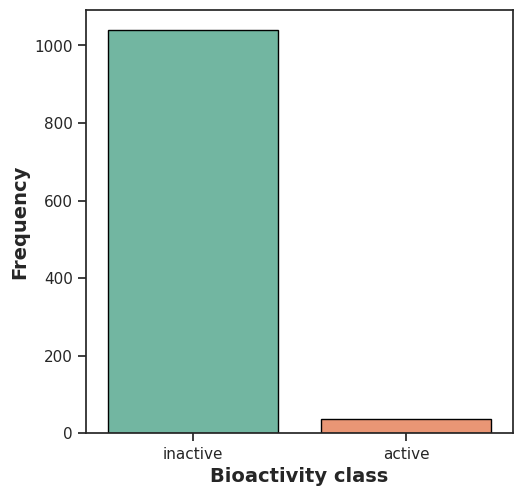

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2", len(df_2class['bioactivity_class'].unique()))

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black', palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

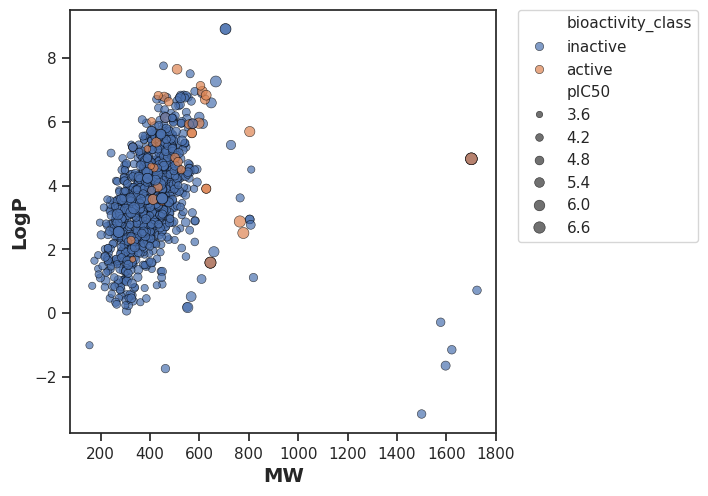

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu


  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  stat, p = mannwhitneyu(active, inactive)


# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

#### **pIC50 value**

<ipython-input-155-d5633908e35a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class, palette=colors)


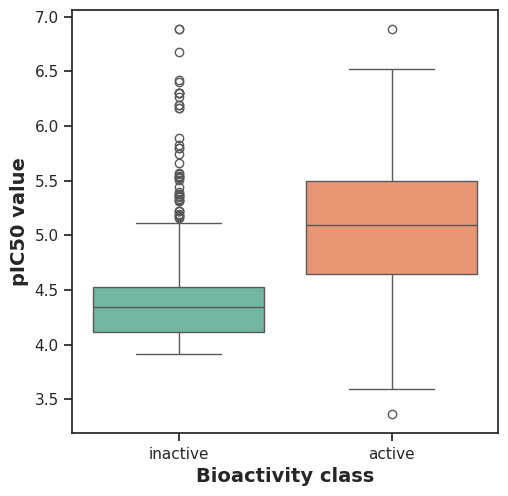

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2", len(df_2class['bioactivity_class'].unique()))

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')


In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,32141.0,4.700999e-11,0.05,Different distribution (reject H0)


#### **MW**

<ipython-input-158-531135bebc73>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y='MW', data=df_2class, palette=colors)


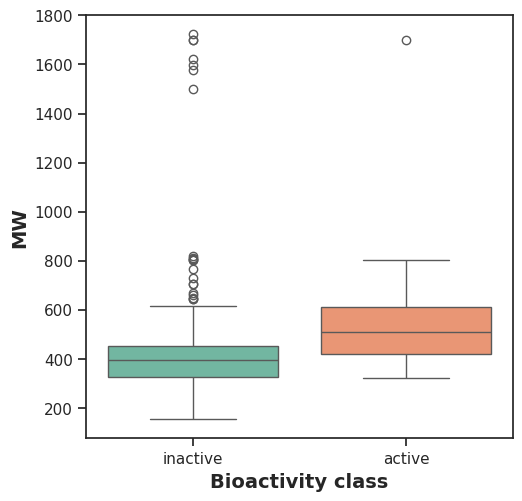

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2", len(df_2class['bioactivity_class'].unique()))

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='MW', data=df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')


In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,30923.0,3.189840e-09,0.05,Different distribution (reject H0)


#### **LogP**

<ipython-input-163-ead04f005b07>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette = colors)


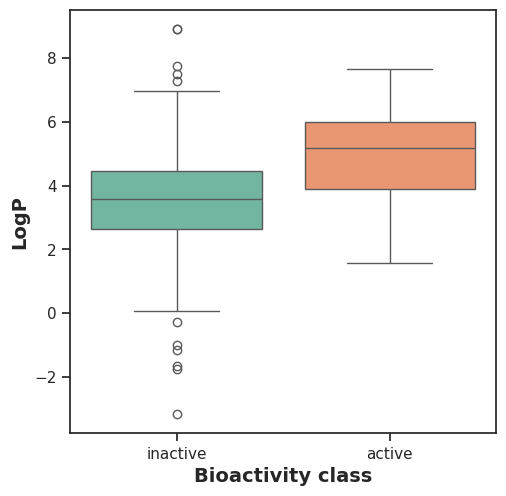

In [ ]:
plt.figure(figsize=(5.5, 5.5))

colors = sns.color_palette("Set2", len(df_2class['bioactivity_class'].unique()))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette = colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')


**Statistical analysis | Mann-Whitney U Test**

In [ ]:

mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,29885.5,7.824001e-08,0.05,Different distribution (reject H0)


#### **NumHDonors**

<ipython-input-165-fe727f5c8e75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette=colors)


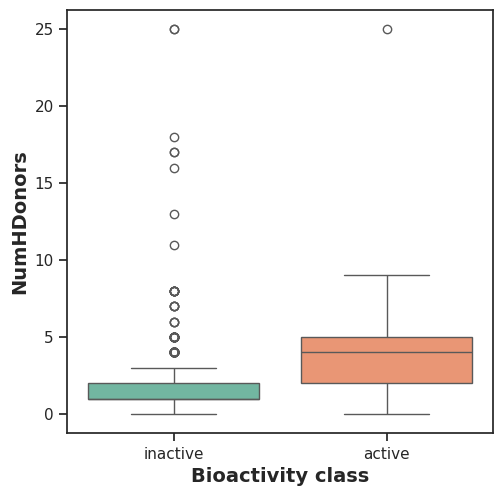

In [ ]:
plt.figure(figsize=(5.5, 5.5))
colors = sns.color_palette("Set2", len(df_2class['bioactivity_class'].unique()))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,28839.5,6.498029e-07,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

<ipython-input-172-f44e637dae60>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette=colors)


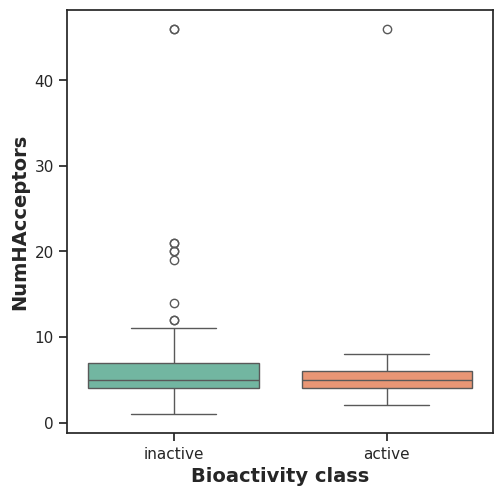

In [ ]:
plt.figure(figsize=(5.5, 5.5))
colors = sns.color_palette("Set2", len(df_2class['bioactivity_class'].unique()))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')


In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,18165.0,0.390922,0.05,Same distribution (fail to reject H0)


## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

	zip warning: name not matched: miniconda/pkgs/python-3.7.6-h0371630_2/compiler_compat/ld
	zip warning: name not matched: drive/MyDrive/Classroom/Introduction to Human Computer Interaction Section B/Nihal IIITD - IHCI Tutorial 1.gdoc
	zip warning: name not matched: drive/MyDrive/Classroom/Introduction to Human Computer Interaction Section B/Nihal IIITD - Tutorial-4 Friday.gdoc
  adding: plot_ic50.pdf (deflated 37%)
  adding: bioactivity_data_2class_pIC50.csv (deflated 71%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: bioactivity_preprocessed_data.csv (deflated 80%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: bioactivity_data_3class_pIC50.csv (deflated 72%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHAcceptors.pdf (deflated 37